# Import Packages

In [2]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from numpy.random import randint
from random import choice
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Preparation

In [14]:
data = pd.read_csv("diabetes.csv")
data = pd.DataFrame(data)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# Check For Missing Values
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [16]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [17]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [19]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (614, 8)
X_test (154, 8)


# Features Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_salced = scaler.transform(X_train)
x_test_salced = scaler.transform(X_test)

In [22]:
pd.DataFrame(x_train_salced).head().style.set_caption('Data After Scaling')

,0,1,2,3,4,5,6,7
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


# Data Visualization

Number of Diabetic:  500
Number of NonDiabetic :  268


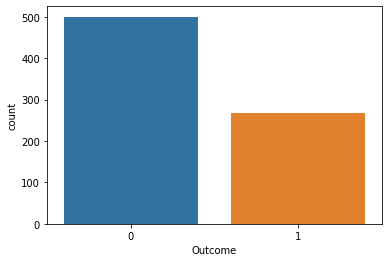

In [21]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
Diabetic, NonDiabetic = y.value_counts()
print('Number of Diabetic: ',Diabetic)
print('Number of NonDiabetic : ',NonDiabetic)

Text(0.5, 0.98, 'correlation between Age and Glucose ')

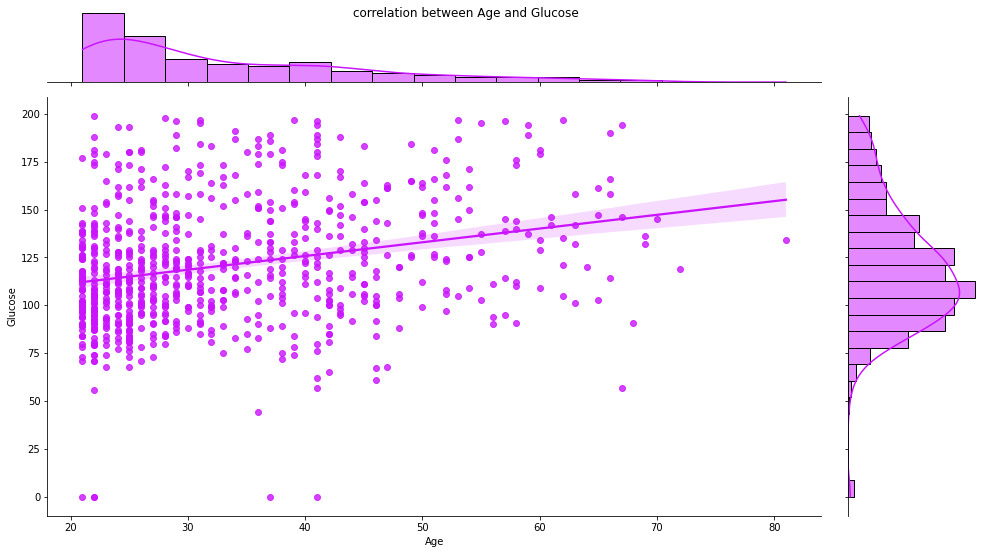

In [25]:
correlation =  sns.jointplot(data.loc[:,'Age'], data.loc[:,'Glucose'], kind="reg", color="#ca13FF")
correlation.fig.set_figwidth(15)
correlation.fig.set_figheight(8)
correlation.fig.suptitle("correlation between Age and Glucose ")

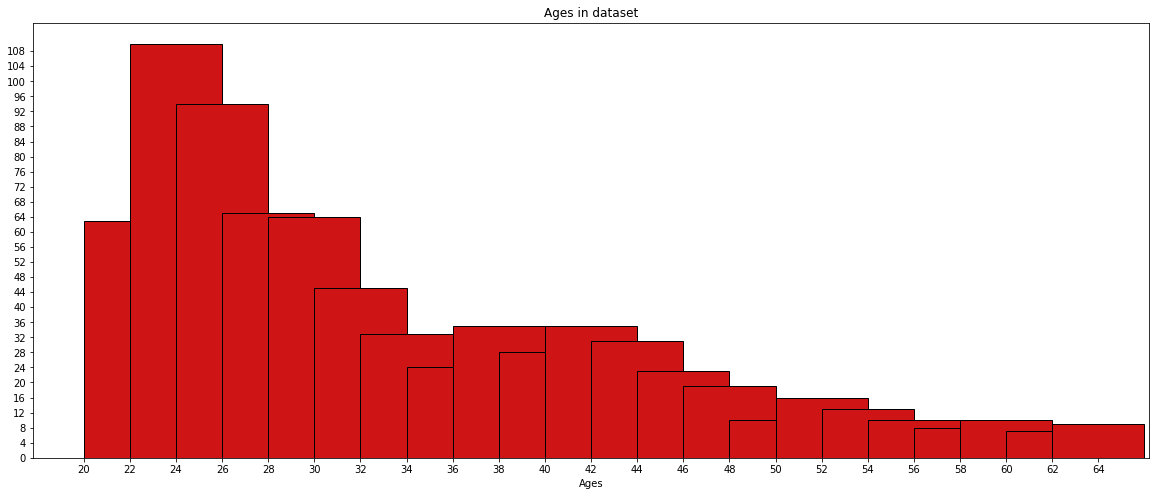

In [100]:
bins = list(range(20,65,2))
plt.figure(figsize = (20,8))
plt.hist(data['Age'].astype(int), width = 4, align = 'mid',
bins = bins, color = '#ce1414', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Ages in dataset')
plt.yticks(np.arange(0,110,4))
plt.show()

Text(0.5, 0.98, 'correlation between Skin Thickness and Blood Pressure ')

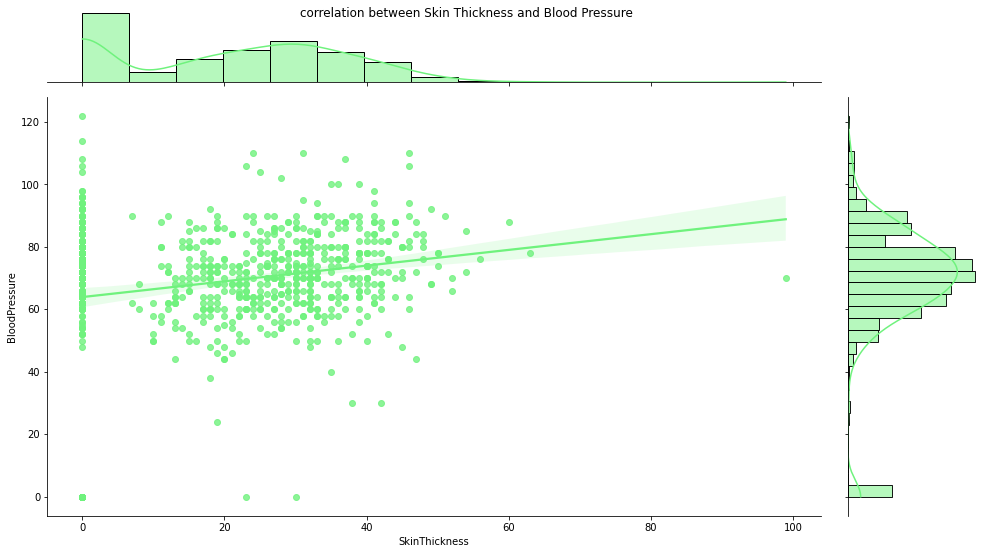

In [121]:
correlation =  sns.jointplot(data.loc[:,'SkinThickness'], data.loc[:,'BloodPressure'], kind="reg", color="#6ff27d")
correlation.fig.set_figwidth(15)
correlation.fig.set_figheight(8)
correlation.fig.suptitle("correlation between Skin Thickness and Blood Pressure ")

<AxesSubplot:title={'center':'all correlations between features'}>

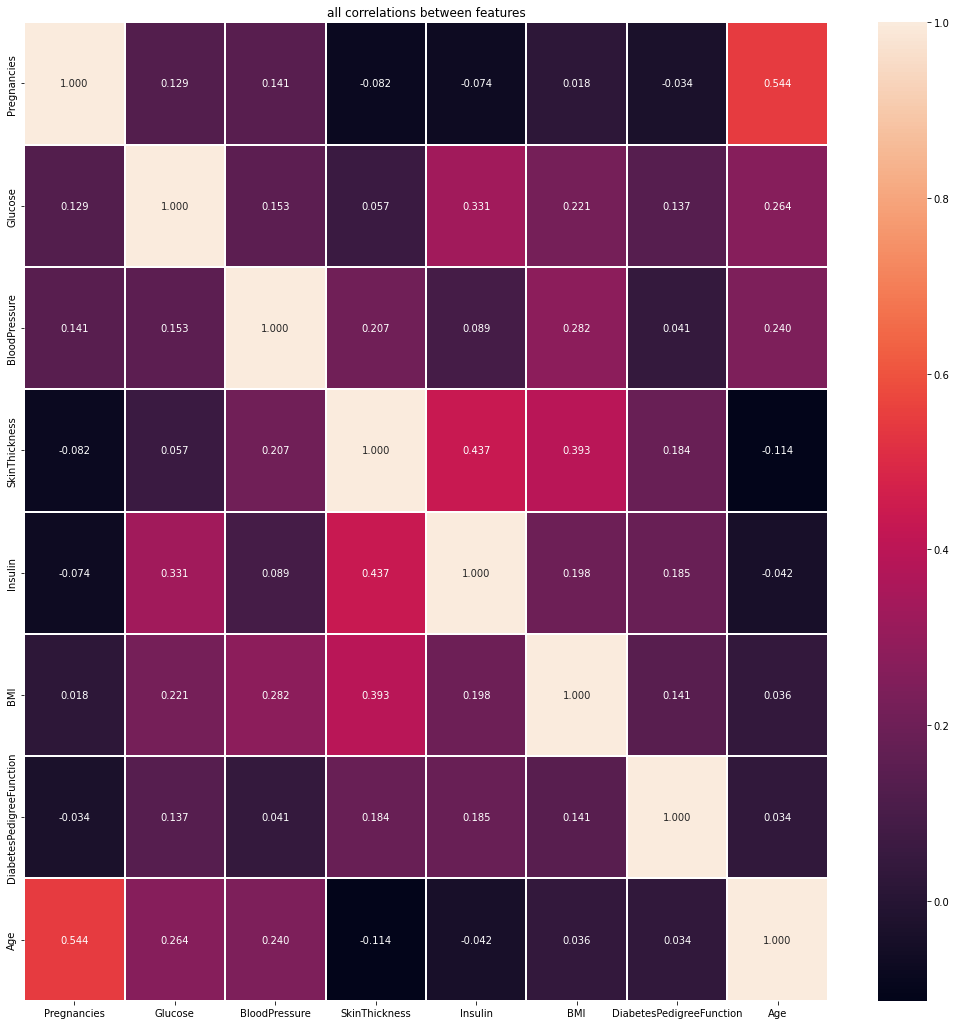

In [131]:
f,ax = plt.subplots(figsize=(18, 18))
plt.title("all correlations between features")
sns.heatmap(X.corr(), annot=True, linewidths=.2, fmt= '.3f',ax=ax)

# SVM Model Without GA

In [34]:
svm = SVC(random_state=1 , class_weight='balanced')
svm.fit(x_train_salced,y_train)

SVC(class_weight='balanced', random_state=1)

In [35]:
y_pred = svm.predict(x_train_salced)
y_pred_test = svm.predict(x_test_salced)

In [36]:
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred_test))

0.8159609120521173
0.7142857142857143


# SVM Model With GA

In [37]:
def model_SVM(C ,gamma  , kernel):
    model = SVC(C=C ,gamma=gamma  , kernel=kernel,class_weight='balanced')
    model.fit(x_train_salced,y_train)
    return model

<center><h1>Genetic Algorithm Steps</h1></center>

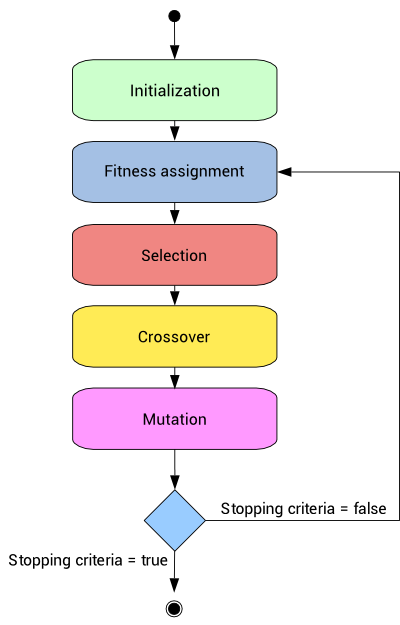

### Initialization

In [38]:
def initialization():
    parameters = {}
    
    C = randint(1,10)
    parameters["C"] = C
    
    gamma = choice(['auto' , 'scale'])
    parameters["gamma"] = gamma
    
    kernel = choice(['linear', 'poly', 'rbf', 'sigmoid'])
    parameters["kernel"] = kernel
    
    
    return parameters

In [39]:
initialization()

{'C': 9, 'gamma': 'scale', 'kernel': 'linear'}

In [40]:
def generate_population(n):
    population = []
    for i in range(n):
        chromosome = initialization()
        population.append(chromosome)
    return population

In [41]:
generate_population(4)

[{'C': 9, 'gamma': 'scale', 'kernel': 'sigmoid'},
 {'C': 6, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}]

### Fitness functions
**```are used in genetic programming and genetic algorithms to guide simulations towards optimal design solutions```**

In [42]:
def fitness_evaluation(model):
    y_pred_test = model.predict(x_test_salced)
    acc = accuracy_score(y_test,y_pred_test)
    return acc

### Selection

**Stochastic Universal Sampling** is quite similar to Roulette wheel selection, however instead of having just one fixed point, we have multiple fixed points as shown in the following image. Therefore, **all the parents are chosen in just one spin** of the wheel. Also, such a setup encourages the highly fit individuals to be chosen at least once.

```The region of the wheel which comes in front of the fixed point is chosen as the parent. For the second parent, the same process is repeated.```

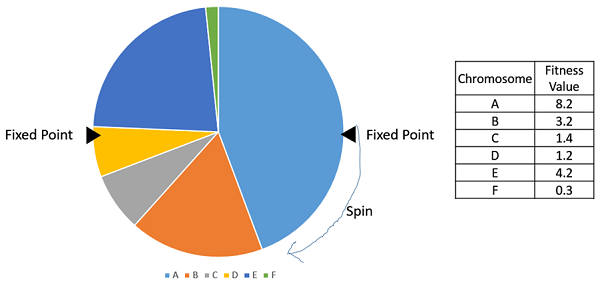

In [43]:
def selection(population_fitness):
    total = sum(population_fitness)
    percentage = [round((x/total) * 100) for x in population_fitness]
    selection_wheel = []
    for pop_index,num in enumerate(percentage):
        selection_wheel.extend([pop_index]*num)
    parent1_ind = choice(selection_wheel)
    parent2_ind = choice(selection_wheel)
    return [parent1_ind, parent2_ind]

### CrossOver
 **```a genetic operator used to combine the genetic information of two parents to generate new offspring```**
 
 **Types of CrossOver**
 - One Point Crossover
 - Multi Point Crossover
 - Uniform Crossover
 - Whole Arithmetic Recombination
 - Davis’ Order Crossover
 
#### Here we used One Point Crossover

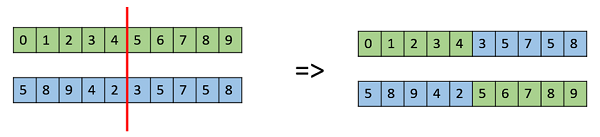

In [44]:
def crossover(parent1, parent2):
    child1 = {}
    child2 = {}
    
    child1["C"] = parent2["C"]
    child2["C"] = parent1["C"]

    child1["gamma"] = parent1["gamma"]
    child2["gamma"] = parent2["gamma"]
    
    child1["kernel"] = parent2["kernel"]
    child2["kernel"] = parent1["kernel"]
    
    return [child1, child2]

### Mutation
 **```mutation may be defined as a small random tweak in the chromosome, to get a new solution```**
 
**Types of Mutation**
 - Bit Flip Mutation
 - Random Resetting
 - Swap Mutation
 - Scramble Mutation
 - Inversion Mutation
 
#### In our code we used Bit Flip Mutation
 

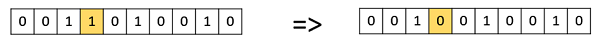

In [45]:
def mutation(chromosome):
    kernel = choice(['linear', 'poly', 'rbf', 'sigmoid'])
    if kernel == 'sigmoid':
        chromosome["kernel"] = 'linear'
    return chromosome

### Start GA

In [46]:
generations = 500
acc_threshold = 90
num_pop = 10


population = generate_population(num_pop)
for generation in range(generations):
    population_fitness = []
    for chromosome in population:
        C = chromosome['C']
        gamma = chromosome['gamma'] 
        kernel = chromosome['kernel'] 
        
        model = model_SVM(C ,gamma  , kernel)
        
        acc = fitness_evaluation(model)
        print("Parameters: ", chromosome)
        print("Accuracy: ", round(acc,3))
        population_fitness.append(acc)
        
    parents_ind = selection(population_fitness)
    parent1 = population[parents_ind[0]]
    parent2 = population[parents_ind[1]]
    children = crossover(parent1, parent2)
    child1 = mutation(children[0])
    child2 = mutation(children[1])
    population.append(child1)
    population.append(child2)
    print("Generation ", generation+1," Outcome: ")
    
    if max(population_fitness) >= acc_threshold:
        print("Obtained desired accuracy: ", max(population_fitness))
        break
    else:
        print("Maximum accuracy in generation {} : {}".format(generation+1, max(population_fitness)))

    first_min = min(population_fitness)
    
    first_min_ind = population_fitness.index(first_min)
    
    population.remove(population[first_min_ind])
    
    second_min = min(population_fitness)
    
    second_min_ind = population_fitness.index(second_min)
    
    population.remove(population[second_min_ind])

Parameters:  {'C': 4, 'gamma': 'scale', 'kernel': 'sigmoid'}
Accuracy:  0.656
Parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy:  0.714
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 3, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 5, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.753
Parameters:  {'C': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy:  0.708
Parameters:  {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 2, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  1  Outcome: 
Maximum accuracy in generation 1 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 3, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 5,

Parameters:  {'C': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy:  0.708
Generation  11  Outcome: 
Maximum accuracy in generation 11 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma'

Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  21  Outcome: 
Maximum accuracy in generation 21 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma

Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Generation  31  Outcome: 
Maximum accuracy in generation 31 : 0.7597402597402597
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 6, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.747
Parameters:  {'C': 6, 'gamma': '

Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Generation  41  Outcome: 
Maximum accuracy in generation 41 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'a

Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.695
Generation  52  Outcome: 
Maximum accuracy in generation 52 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 's

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  62  Outcome: 
Maximum accuracy in generation 62 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 's

Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Generation  72  Outcome: 
Maximum accuracy in generation 72 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 's

Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  82  Outcome: 
Maximum accuracy in generation 82 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'a

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  92  Outcome: 
Maximum accuracy in generation 92 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  93  Outcome: 
Maximum accuracy in generation 93 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma'

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  103  Outcome: 
Maximum accuracy in generation 103 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  113  Outcome: 
Maximum accuracy in generation 113 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  123  Outcome: 
Maximum accuracy in generation 123 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  134  Outcome: 
Maximum accuracy in generation 134 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  144  Outcome: 
Maximum accuracy in generation 144 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  154  Outcome: 
Maximum accuracy in generation 154 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  155  Outcome: 
Maximum accuracy in generation 155 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  165  Outcome: 
Maximum accuracy in generation 165 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  175  Outcome: 
Maximum accuracy in generation 175 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  185  Outcome: 
Maximum accuracy in generation 185 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  196  Outcome: 
Maximum accuracy in generation 196 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'aut

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  206  Outcome: 
Maximum accuracy in generation 206 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  216  Outcome: 
Maximum accuracy in generation 216 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  217  Outcome: 
Maximum accuracy in generation 217 : 0.7597402597402597
Parameters:  {'C': 9, 'ga

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  227  Outcome: 
Maximum accuracy in generation 227 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  237  Outcome: 
Maximum accuracy in generation 237 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  247  Outcome: 
Maximum accuracy in generation 247 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'ga

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  257  Outcome: 
Maximum accuracy in generation 257 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  258  Outcome: 
Maximum 

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  268  Outcome: 
Maximum accuracy in generation 268 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  278  Outcome: 
Maximum accuracy in generation 278 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  288  Outcome: 
Maximum accuracy in generation 288 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  298  Outcome: 
Maximum accuracy in generation 298 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  299  Outcome: 
Maximum 

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  309  Outcome: 
Maximum accuracy in generation 309 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  319  Outcome: 
Maximum accuracy in generation 319 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  329  Outcome: 
Maximum accuracy in generation 329 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  330  Outcome: 
Maximum acc

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  340  Outcome: 
Maximum accuracy in generation 340 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  350  Outcome: 
Maximum accuracy in generation 350 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'aut

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  360  Outcome: 
Maximum accuracy in generation 360 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  361  Outcome: 
Maximum acc

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  371  Outcome: 
Maximum accuracy in generation 371 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  381  Outcome: 
Maximum accuracy in generation 381 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  391  Outcome: 
Maximum accuracy in generation 391 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  401  Outcome: 
Maximum accuracy in generation 401 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  402  Outcome: 
Maximum accuracy in generation 402 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  412  Outcome: 
Maximum accuracy in generation 412 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  422  Outcome: 
Maximum accuracy in generation 422 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  433  Outcome: 
Maximum accuracy in generation 433 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  443  Outcome: 
Maximum accuracy in generation 443 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  444  Outcome: 
Maximum accuracy in generation 444 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  454  Outcome: 
Maximum accuracy in generation 454 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  464  Outcome: 
Maximum accuracy in generation 464 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  474  Outcome: 
Maximum accuracy in generation 474 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto',

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy:  0.695
Generation  484  Outcome: 
Maximum accuracy in generation 484 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  485  Outcome: 
Maximum accuracy in generation 485 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma

Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Generation  495  Outcome: 
Maximum accuracy in generation 495 : 0.7597402597402597
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy:  0.76
Parameters:  {'C': 9, 'gamma': 'auto', 'k

In [47]:
svm_acc = round(accuracy_score(y_test,y_pred_test),2)
best_acc = round(max(population_fitness),2)
print("SVM without GA: " , svm_acc)
print("SVM with GA: " , best_acc)

SVM without GA:  0.71
SVM with GA:  0.76


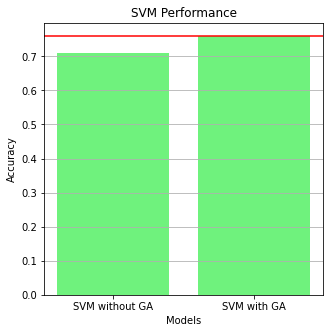

In [49]:
acc = {"SVM without GA" : svm_acc, "SVM with GA" : best_acc}
models = list(acc.keys())
values = list(acc.values())

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(models, values, color ='#6ff27d')
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.axhline(y=0.76, color='#ff0000', linestyle='-')
plt.title("SVM Performance")
plt.show()

# KNN without GA

```When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2```

In [76]:
knn =KNeighborsClassifier(p=1) 
knn.fit(x_train_salced,y_train)

KNeighborsClassifier(p=1)

In [77]:
y_pred_knn = knn.predict(x_train_salced)
y_pred_test_knn = knn.predict(x_test_salced)

In [78]:
print(accuracy_score(y_train,y_pred_knn))
print(accuracy_score(y_test,y_pred_test_knn))

0.8061889250814332
0.6623376623376623


# KNN with GA

In [36]:
def model_KNN(n_neighbors , p):
    knn_GA =KNeighborsClassifier(n_neighbors=n_neighbors  ,  p=p ) 
    knn_GA.fit(x_train_salced,y_train)
    return knn_GA

In [51]:
def initialization_KNN():
    parameters = {}
    
    n_neighbors = randint(5,50)
    parameters["n_neighbors"] = n_neighbors
    
    p = choice([2,1])
    parameters["p"] = p
    
    
    return parameters

In [38]:
def generate_population_KNN(n):
    population_KNN = []
    for i in range(n):
        chromosome = initialization_KNN()
        population_KNN.append(chromosome)
    return population_KNN

In [39]:
generate_population_KNN(4)

[{'n_neighbors': 20, 'p': 2},
 {'n_neighbors': 34, 'p': 2},
 {'n_neighbors': 12, 'p': 2},
 {'n_neighbors': 16, 'p': 2}]

In [45]:
def fitness_evaluation_KNN(model):
    y_pred_test_KNN_GA = model.predict(x_test_salced)
    acc_KNN = accuracy_score(y_test,y_pred_test_KNN_GA)
    return acc_KNN

In [47]:
def selection_KNN(population_fitness_KNN):
    total = sum(population_fitness_KNN)
    percentage = [round((x/total) * 100) for x in population_fitness_KNN]
    selection_wheel = []
    for pop_index,num in enumerate(percentage):
        selection_wheel.extend([pop_index]*num)
    parent1_ind_KNN = choice(selection_wheel)
    parent2_ind_KNN = choice(selection_wheel)
    return [parent1_ind_KNN, parent2_ind_KNN]

In [42]:
def crossover_KNN(parent1_KNN, parent2_KNN):
    child1_KNN = {}
    child2_KNN = {}
    
    child1_KNN["n_neighbors"] = parent2_KNN["n_neighbors"]
    child2_KNN["n_neighbors"] = parent1_KNN["n_neighbors"]
    
    child1_KNN["p"] = parent2_KNN["p"]
    child2_KNN["p"] = parent1_KNN["p"]
    
    return [child1_KNN, child2_KNN]

In [43]:
def mutation_KNN(chromosome):
    flag = randint(1,50)
    if flag >= 40:
        chromosome["n_neighbors"] = 20
    return chromosome

In [53]:
generations = 500
acc_threshold = 90
num_pop = 10


population_KNN = generate_population_KNN(num_pop)
for generation in range(generations):
    population_fitness_KNN = []
    for chromosome in population_KNN:
        n_neighbors = chromosome['n_neighbors']
        p = chromosome['p'] 
        
        model_KNN_GA = model_KNN(n_neighbors , p)
        
        acc_KNN_GA = fitness_evaluation_KNN(model_KNN_GA)
        print("Parameters: ", chromosome)
        print("Accuracy: ", round(acc_KNN_GA,3))
        population_fitness_KNN.append(acc_KNN_GA)
        
    parents_ind_KNN = selection_KNN(population_fitness_KNN)
    parent1_KNN = population_KNN[parents_ind_KNN[0]]
    parent2_KNN = population_KNN[parents_ind_KNN[1]]
    children_KNN = crossover_KNN(parent1_KNN, parent2_KNN)
    child1_KNN = mutation_KNN(children_KNN[0])
    child2_KNN = mutation_KNN(children_KNN[1])
    population_KNN.append(child1_KNN)
    population_KNN.append(child2_KNN)
    print("Generation ", generation+1," Outcome: ")
    
    if max(population_fitness_KNN) >= acc_threshold:
        print("Obtained desired accuracy: ", max(population_fitness_KNN))
        break
    else:
        print("Maximum accuracy in generation {} : {}".format(generation+1, max(population_fitness_KNN)))

    first_min_KNN = min(population_fitness_KNN)
    
    first_min_ind_KNN = population_fitness_KNN.index(first_min_KNN)
    
    population_KNN.remove(population_KNN[first_min_ind_KNN])
    
    second_min_KNN = min(population_fitness_KNN)
    
    second_min_ind_KNN = population_fitness_KNN.index(second_min_KNN)
    
    population_KNN.remove(population_KNN[second_min_ind_KNN])

Parameters:  {'n_neighbors': 36, 'p': 2}
Accuracy:  0.753
Parameters:  {'n_neighbors': 48, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 16, 'p': 2}
Accuracy:  0.747
Parameters:  {'n_neighbors': 42, 'p': 2}
Accuracy:  0.753
Parameters:  {'n_neighbors': 43, 'p': 1}
Accuracy:  0.786
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 12, 'p': 2}
Accuracy:  0.721
Parameters:  {'n_neighbors': 28, 'p': 2}
Accuracy:  0.753
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Parameters:  {'n_neighbors': 25, 'p': 2}
Accuracy:  0.74
Generation  1  Outcome: 
Maximum accuracy in generation 1 : 0.7857142857142857
Parameters:  {'n_neighbors': 36, 'p': 2}
Accuracy:  0.753
Parameters:  {'n_neighbors': 48, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 16, 'p': 2}
Accuracy:  0.747
Parameters:  {'n_neighbors': 42, 'p': 2}
Accuracy:  0.753
Parameters:  {'n_neighbors': 43, 'p': 1}
Accuracy:  0.786
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  

Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Generation  13  Outcome: 
Maximum accuracy in generation 13 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 31, 'p': 1}
Accuracy:  0.766
Generation  14  Outcome: 
Maximum accuracy in generation 14 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  26  Outcome: 
Maximum accuracy in generation 26 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  27  Outcome: 
Maximum accuracy in generation 27 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors'

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  39  Outcome: 
Maximum accuracy in generation 39 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  40  Outcome: 
Maximum accuracy in gene

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  52  Outcome: 
Maximum accuracy in generation 52 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  53  Outcome: 
Maximum accuracy in generation 53 : 0.7727272727272727
Parameters:  {'n_neighbors'

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  65  Outcome: 
Maximum accuracy in generation 65 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  66  Outcome: 
Maximum accuracy in generation 66 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  78  Outcome: 
Maximum accuracy in generation 78 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  79  Outcome: 
Maximum accuracy in generation 79 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  91  Outcome: 
Maximum accuracy in generation 91 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  92  Outcome: 
Maximum accuracy in generation 92 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  104  Outcome: 
Maximum accuracy in generation 104 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  117  Outcome: 
Maximum accuracy in generation 117 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  118  Outcome: 
Maximum accuracy in generation 118 : 0.7727272727272727
Parameters:  {'n_neighbor

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  130  Outcome: 
Maximum accuracy in generation 130 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  131  Outcome: 
Maximum accuracy in generation 131 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighb

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  143  Outcome: 
Maximum accuracy in generation 143 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  144  Outcome: 
Maximum accuracy in generation 144 : 0.7727272727272727
Parameters:  {'n_neighb

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  156  Outcome: 
Maximum accuracy in generation 156 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  169  Outcome: 
Maximum accuracy in generation 169 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  181  Outcome: 
Maximum accuracy in generation 181 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  182  Outcome: 
Maximum accuracy in generation 182 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neigh

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  194  Outcome: 
Maximum accuracy in generation 194 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  207  Outcome: 
Maximum accuracy in generation 207 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  220  Outcome: 
Maximum accuracy in generation 220 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  233  Outcome: 
Maximum accuracy in generation 233 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  234  Outcome: 
Maximum accuracy in g

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  247  Outcome: 
Maximum accuracy in generation 247 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  260  Outcome: 
Maximum accuracy in generation 260 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  261  Outcome: 
Maximum accuracy in g

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  273  Outcome: 
Maximum accuracy in generation 273 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  285  Outcome: 
Maximum accuracy in generation 285 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  286  Outcome: 
Maximum accuracy in generation 286 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neigh

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  298  Outcome: 
Maximum accuracy in generation 298 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  311  Outcome: 
Maximum accuracy in generation 311 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  324  Outcome: 
Maximum accuracy in generation 324 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  337  Outcome: 
Maximum accuracy in generation 337 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  349  Outcome: 
Maximum accuracy in generation 349 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  350  Outcome: 
Maximum accuracy in generation 350 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neigh

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  362  Outcome: 
Maximum accuracy in generation 362 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  363  Outcome: 
Maximum accuracy in 

Maximum accuracy in generation 375 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  376  Outcome: 
Maximum accuracy in generation 376 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  389  Outcome: 
Maximum accuracy in generation 389 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  402  Outcome: 
Maximum accuracy in generation 402 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accura

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  415  Outcome: 
Maximum accuracy in generation 415 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  416  Outcome: 
Maximum accuracy in g

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  428  Outcome: 
Maximum accuracy in generation 428 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  429  Outcome: 
Maximum accuracy in g

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  441  Outcome: 
Maximum accuracy in generation 441 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  442  Outcome: 
Maximum accuracy in generation 442 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neigh

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  454  Outcome: 
Maximum accuracy in generation 454 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accurac

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  466  Outcome: 
Maximum accuracy in generation 466 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  467  Outcome: 
Maximum accuracy in generation 467 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighb

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  479  Outcome: 
Maximum accuracy in generation 479 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Generation  480  Outcome: 
Maximum accuracy in g

Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  492  Outcome: 
Maximum accuracy in generation 492 : 0.7727272727272727
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Parameters:  {'n_neighbors': 20, 'p': 1}
Accuracy:  0.76
Parameters:  {'n_neighbors': 46, 'p': 1}
Accuracy:  0.773
Generation  493  Outcome: 
Maximum accuracy in g

## After Chosing Best Parameter

In [82]:
knn_GA_last =KNeighborsClassifier(n_neighbors=43,p=1) 
knn_GA_last.fit(x_train_salced,y_train)
y_pred_knn_last = knn_GA_last.predict(x_train_salced)
y_pred_test_knn_last = knn_GA_last.predict(x_test_salced)
print("KNN without GA: ",accuracy_score(y_test,y_pred_test_knn))
print("KNN with GA: " , accuracy_score(y_test,y_pred_test_knn_last))

KNN without GA:  0.6623376623376623
KNN with GA:  0.7857142857142857


In [99]:
KNN_acc = accuracy_score(y_test,y_pred_test_knn)
best_knn_acc = accuracy_score(y_test,y_pred_test_knn_last)

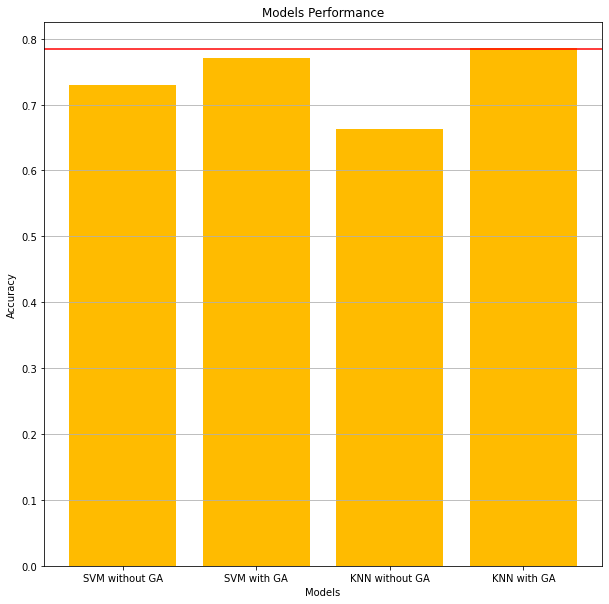

In [114]:
acc = {"SVM without GA" : svm_acc, 
       "SVM with GA" : best_acc , 
       "KNN without GA" : KNN_acc,
      "KNN with GA" : best_knn_acc
      }
models = list(acc.keys())
values = list(acc.values())

fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.bar(models, values, color ='#ffbb00')
plt.axhline(y=0.785, color='#ff0000', linestyle='-')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.title("Models Performance")
plt.show()

## This Part for explanation only for how selection function work

In [165]:
test_population_fitness = [72, 51,91,99]

In [182]:
total = sum(test_population_fitness)
percentage = [round((x/total) * 100) for x in test_population_fitness]
selection_wheel = []
for pop_index,num in enumerate(percentage):
    selection_wheel.extend([pop_index]*num)
parent1_ind_KNN = choice(selection_wheel)
parent2_ind_KNN = choice(selection_wheel)

In [189]:
percentage

[23, 16, 29, 32]

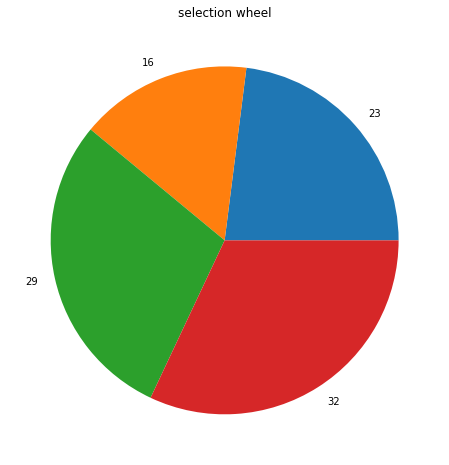

In [198]:
mylabels = [23, 16, 29, 32]
plt.figure(figsize=(20,8))
plt.pie(percentage,labels=mylabels)
plt.title("selection wheel")
plt.show() 